# Load Libraries


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
!pip install matplotlib-venn
from matplotlib_venn import venn2, venn3
import numpy as np
import seaborn as sns

# Heatmap MCC Horizontal


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_mcc_raw.csv')
df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)
df_numeric = df[df['Benchmark'].isin(['Genomic Benchmark', 'Nucleotide Transformer Tasks', 'GUE'])]

In [12]:
order = {'dummy_mouse_enhancers_ensembl':44,
 'demo_coding_vs_intergenomic_seqs':20,
 'demo_human_or_worm':10,
 'human_enhancers_cohn':43,
 'human_enhancers_ensembl':42,
 'human_ensembl_regulatory':41,
 'human_nontata_promoters':49.4,
 'human_ocr_ensembl':41,
 'prom_core_all':49,
 'prom_core_notata':49.6,
 'prom_core_tata':49.3,
 'prom_300_all':48,
 'prom_300_notata':49.5,
 'prom_300_tata':49.2,
 'human_tfp_0':50,
 'human_tfp_1':51,
 'human_tfp_2':52,
 'human_tfp_3':53,
 'human_tfp_4':54,
 'splice_site_prediction':33,
 'mouse_tfp_0':55,
 'mouse_tfp_1':56,
 'mouse_tfp_2':57,
 'mouse_tfp_3':58,
 'mouse_tfp_4':59,
 'virus_covid':70,
 'H3':60,
 'H3K14ac':61,
 'H3K36me3':62,
 'H3K4me1':63,
 'H3K4me2':64,
 'H3K4me3':65,
 'H3K79me3':66,
 'H3K9ac':67,
 'H4':68,
 'H4ac':69,
 'promoter_all':47,
 'promoter_no_tata':49.5,
 'promoter_tata':49.1,
 'splice_sites_all':30,
 'splice_sites_acceptors':31,
 'splice_sites_donors':32,
 'enhancers':45,
 'enhancers_types':46}

In [13]:
df_numeric['order'] = df_numeric['Dataset'].map(order)


<ipython-input-13-3731f0e5a1d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['order'] = df_numeric['Dataset'].map(order)


In [14]:
df_numeric = df_numeric.sort_values(by='order')
df_numeric.head()

,Benchmark,Abb,Category,Dataset,label,CNN,GPT-2,NT-kmer,DNABERT1-kmer,DNABERT2-bpe,HyenaDNA-char,Mamba-char,Mamba-bpe,Caduceus-char,order
2,Genomic Benchmark,GB,species,demo_human_or_worm,GB-demo_human_or_worm,0.942,0.595,0.891,0.816,0.853,0.958,0.968,0.957,0.963,10.0
1,Genomic Benchmark,GB,coding,demo_coding_vs_intergenomic_seqs,GB-demo_coding_vs_intergenomic_seqs,0.892,0.541,0.818,0.732,0.792,0.899,0.913,0.886,0.827,20.0
47,Nucleotide Transformer Tasks,NTT,splice sites,splice_sites_all,NTT-splice_sites_all,0.955,0.332,0.966,0.968,0.899,0.938,0.924,0.341,0.912,30.0
48,Nucleotide Transformer Tasks,NTT,splice sites,splice_sites_acceptors,NTT-splice_sites_acceptors,0.921,0.162,0.930,0.943,0.923,0.896,0.827,0.593,0.944,31.0
49,Nucleotide Transformer Tasks,NTT,splice sites,splice_sites_donors,NTT-splice_sites_donors,0.933,0.235,0.944,0.950,0.927,0.886,0.776,0.536,0.889,32.0


In [15]:
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark','Dataset','Abb'])
df_numeric.head()

,label,CNN,GPT-2,NT-kmer,DNABERT1-kmer,DNABERT2-bpe,HyenaDNA-char,Mamba-char,Mamba-bpe,Caduceus-char,order
2,GB-demo_human_or_worm,0.942,0.595,0.891,0.816,0.853,0.958,0.968,0.957,0.963,10.0
1,GB-demo_coding_vs_intergenomic_seqs,0.892,0.541,0.818,0.732,0.792,0.899,0.913,0.886,0.827,20.0
47,NTT-splice_sites_all,0.955,0.332,0.966,0.968,0.899,0.938,0.924,0.341,0.912,30.0
48,NTT-splice_sites_acceptors,0.921,0.162,0.930,0.943,0.923,0.896,0.827,0.593,0.944,31.0
49,NTT-splice_sites_donors,0.933,0.235,0.944,0.950,0.927,0.886,0.776,0.536,0.889,32.0


In [16]:
datasets = df_numeric['label'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']

df_numeric = df_numeric.drop(columns=['label','order']).to_numpy()
df_numeric = df_numeric.transpose()

In [17]:
def heatmap(df_numeric, title, filename, width, height):
  fig, ax = plt.subplots(figsize=(width, height))
  im = ax.imshow(df_numeric)
  im = ax.imshow(df_numeric, cmap='GnBu',vmin=0)

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical', fraction=0.01, pad=0.02)
  cbar.set_label('MCC', fontsize=12)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(datasets)), labels=datasets)
  ax.set_yticks(np.arange(len(models)), labels=models, fontsize=12)

  ax.xaxis.set_ticks_position('top')  # Move x-axis ticks and labels to the top
  ax.xaxis.set_label_position('top')  # Move x-axis label to the top

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor", fontsize=12)

  # Add values in boxes
  #for i in range(len(models)):
  #  for j in range(len(datasets)):
  #      text = ax.text(j, i, df_numeric[i, j],
  #                     ha="center", va="center", color="w", fontsize=12)
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  #ax.set_title(title, fontsize=14)
  fig.tight_layout()
  #plt.savefig(filename, format='eps',bbox_inches='tight')
  plt.savefig(filename, format='pdf',bbox_inches='tight')
  plt.show()

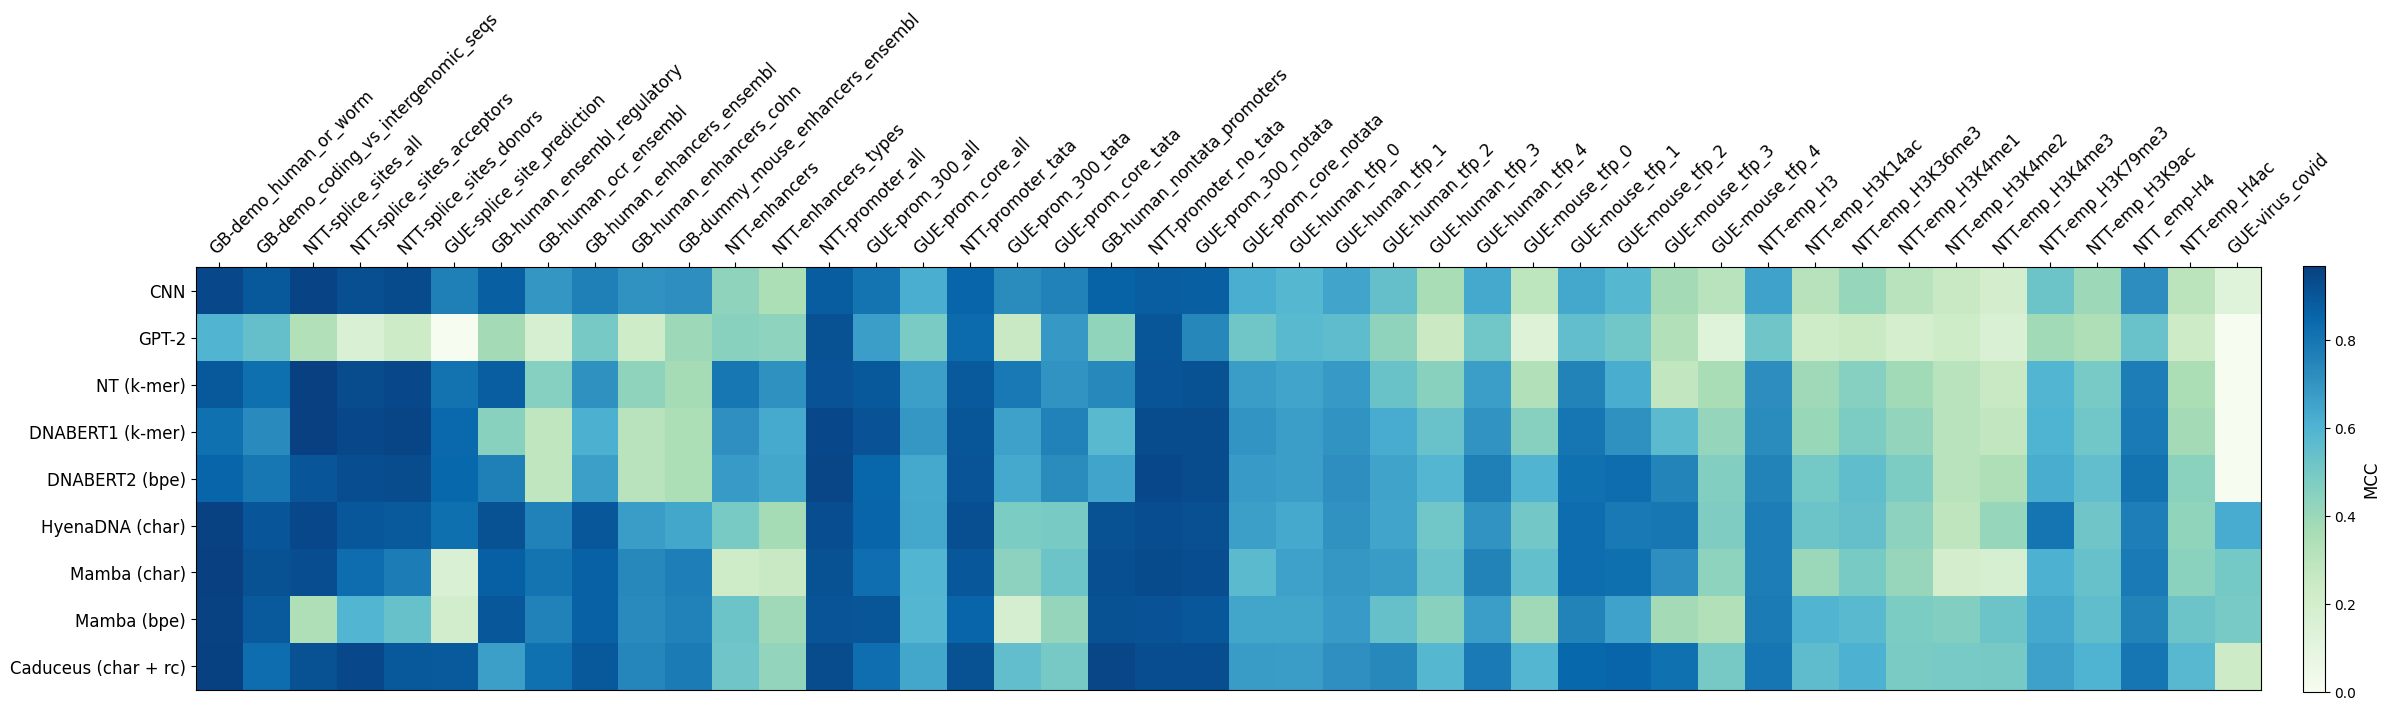

In [18]:
heatmap(df_numeric, 'Model Performance on All Benchmark Tasks', 'model_mcc_heatmap_all_horizontal.pdf', 24, 7)

# Heatmap Accuracy Horizontal

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_acc_raw.csv')
df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df_numeric = df[df['Benchmark'].isin(['Genomic Benchmark', 'Nucleotide Transformer Tasks', 'GUE'])]

In [20]:
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark'])

In [21]:
datasets = df_numeric['Dataset'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['Dataset']).to_numpy()
df_numeric = df_numeric.transpose()

In [22]:
def heatmap_acc(df_numeric, title, filename, width, height):
  fig, ax = plt.subplots(figsize=(width, height))
  im = ax.imshow(df_numeric)
  im = ax.imshow(df_numeric, cmap='GnBu',vmin=0.5)

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical', fraction=0.01, pad=0.02)
  cbar.set_label('ACC', fontsize=12)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(datasets)), labels=datasets)
  ax.set_yticks(np.arange(len(models)), labels=models, fontsize=12)
  ax.xaxis.set_ticks_position('top')  # Move x-axis ticks and labels to the top
  ax.xaxis.set_label_position('top')  # Move x-axis label to the top

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor", fontsize=12)

  # Loop over data dimensions and create text annotations.
  #for i in range(len(models)):
  #  for j in range(len(datasets)):
  #      text = ax.text(j, i, df_numeric[i, j],
  #                     ha="center", va="center", color="w", fontsize=12)
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  ax.set_title(title, fontsize=14)
  fig.tight_layout()
  #plt.savefig(filename, format='eps',bbox_inches='tight')
  plt.savefig(filename, format='pdf',bbox_inches='tight')
  plt.show()

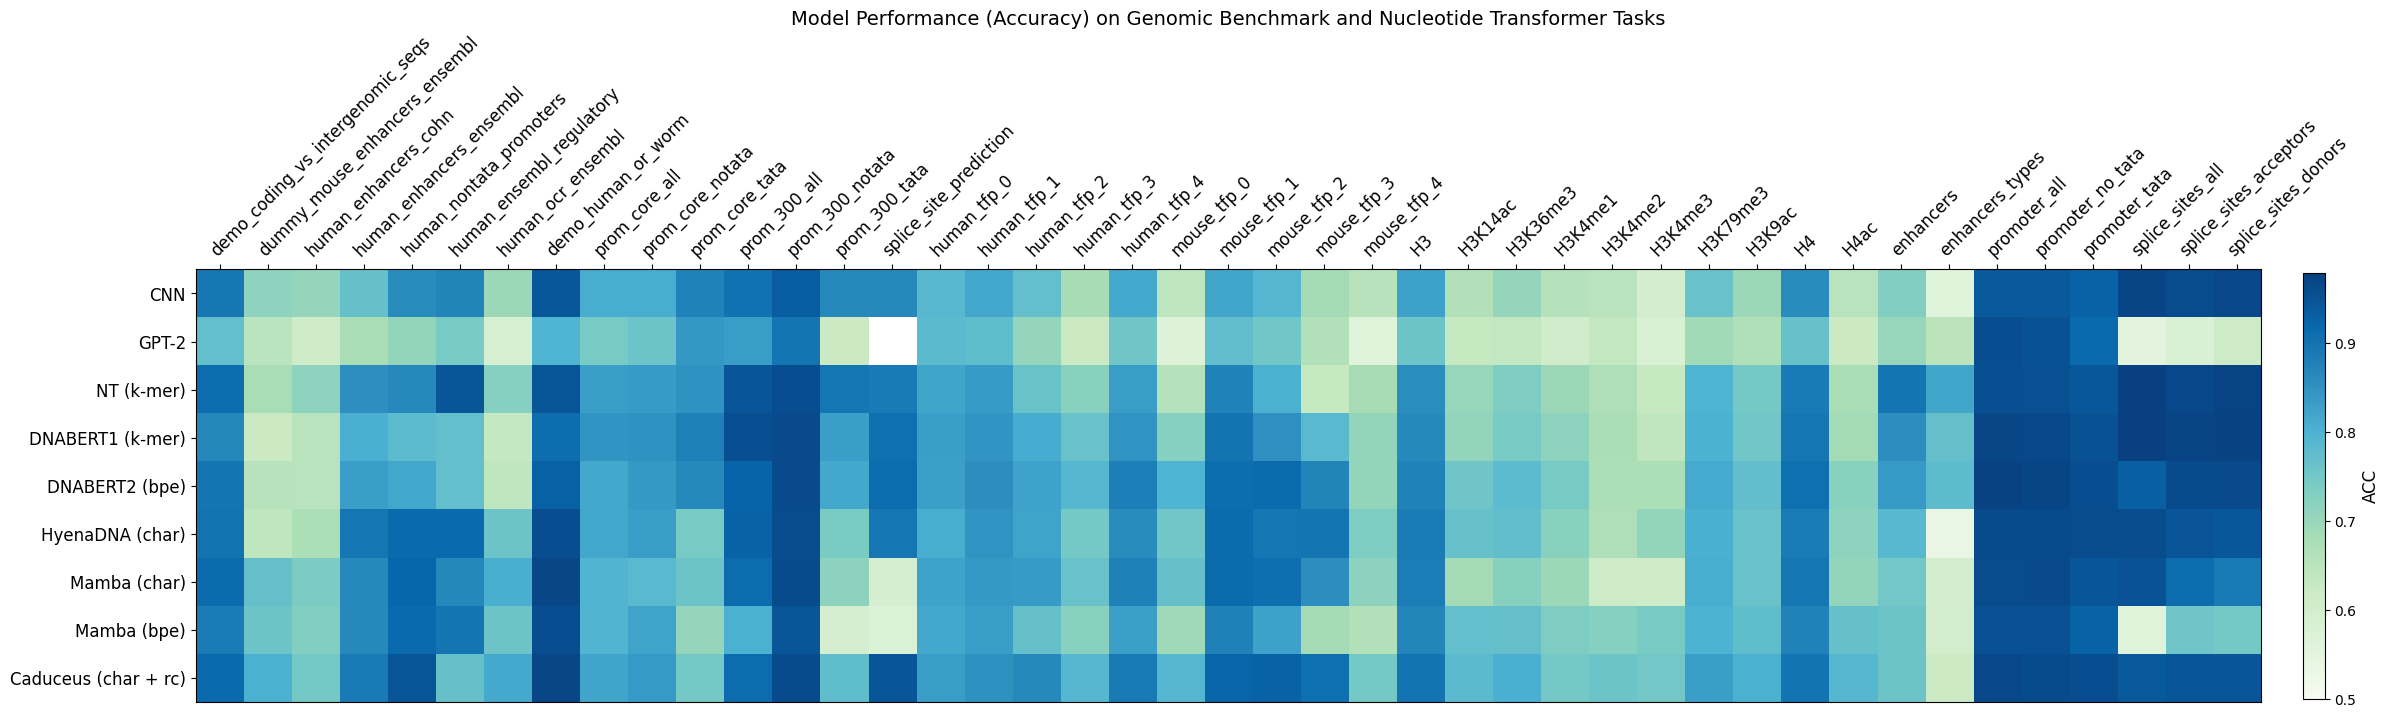

In [23]:
heatmap_acc(df_numeric, 'Model Performance (Accuracy) on Genomic Benchmark and Nucleotide Transformer Tasks', 'model_acc_heatmap_all_horizontal.pdf', 24, 7)

# Heatmap MCC Vertical

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_mcc_raw.csv')
df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)
df_numeric = df[df['Benchmark'].isin(['Genomic Benchmark', 'Nucleotide Transformer Tasks', 'GUE'])]

In [25]:
df_numeric.head()

,Benchmark,Abb,Category,Dataset,label,CNN,GPT-2,NT-kmer,DNABERT1-kmer,DNABERT2-bpe,HyenaDNA-char,Mamba-char,Mamba-bpe,Caduceus-char
0,Genomic Benchmark,GB,enhancers,dummy_mouse_enhancers_ensembl,GB-dummy_mouse_enhancers_ensembl,0.715,0.391,0.369,0.347,0.347,0.641,0.768,0.758,0.781
1,Genomic Benchmark,GB,coding,demo_coding_vs_intergenomic_seqs,GB-demo_coding_vs_intergenomic_seqs,0.892,0.541,0.818,0.732,0.792,0.899,0.913,0.886,0.827
2,Genomic Benchmark,GB,species,demo_human_or_worm,GB-demo_human_or_worm,0.942,0.595,0.891,0.816,0.853,0.958,0.968,0.957,0.963
3,Genomic Benchmark,GB,enhancers,human_enhancers_cohn,GB-human_enhancers_cohn,0.705,0.220,0.430,0.305,0.306,0.671,0.736,0.730,0.743
4,Genomic Benchmark,GB,enhancers,human_enhancers_ensembl,GB-human_enhancers_ensembl,0.767,0.499,0.710,0.609,0.662,0.893,0.864,0.864,0.892


In [26]:
df_numeric = df_numeric.sort_values(by='Category')
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark','Dataset','Abb'])

In [27]:
datasets = df_numeric['label'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['label']).to_numpy()
#df_numeric = df_numeric.transpose()

In [28]:
def heatmap_mcc_vertical(df_numeric, title, filename, width, height):
  fig, ax = plt.subplots(figsize=(width, height))
  im = ax.imshow(df_numeric)
  im = ax.imshow(df_numeric, cmap='GnBu',vmin=0)

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax, orientation='horizontal', location='top', fraction=0.046, pad=0.01)
  cbar.set_label('MCC', fontsize=12)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(models)), labels=models)
  ax.set_yticks(np.arange(len(datasets)), labels=datasets, fontsize=14)
  ax.xaxis.set_ticks_position('bottom')  # Move x-axis ticks and labels to the bottom
  ax.xaxis.set_label_position('bottom')  # Move x-axis label to the bottom

  ax.yaxis.set_ticks_position('right')  # Move y-axis ticks and labels to the right
  ax.yaxis.set_label_position('right')  # Move x-axis label to the right

  plt.setp(ax.get_xticklabels(), rotation=-45, ha="left",
         rotation_mode="anchor", fontsize=14)

  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  #ax.set_title(title, fontsize=14)
  fig.tight_layout()
  #plt.savefig(filename, format='eps',bbox_inches='tight')
  plt.savefig(filename, format='pdf',bbox_inches='tight')
  plt.show()

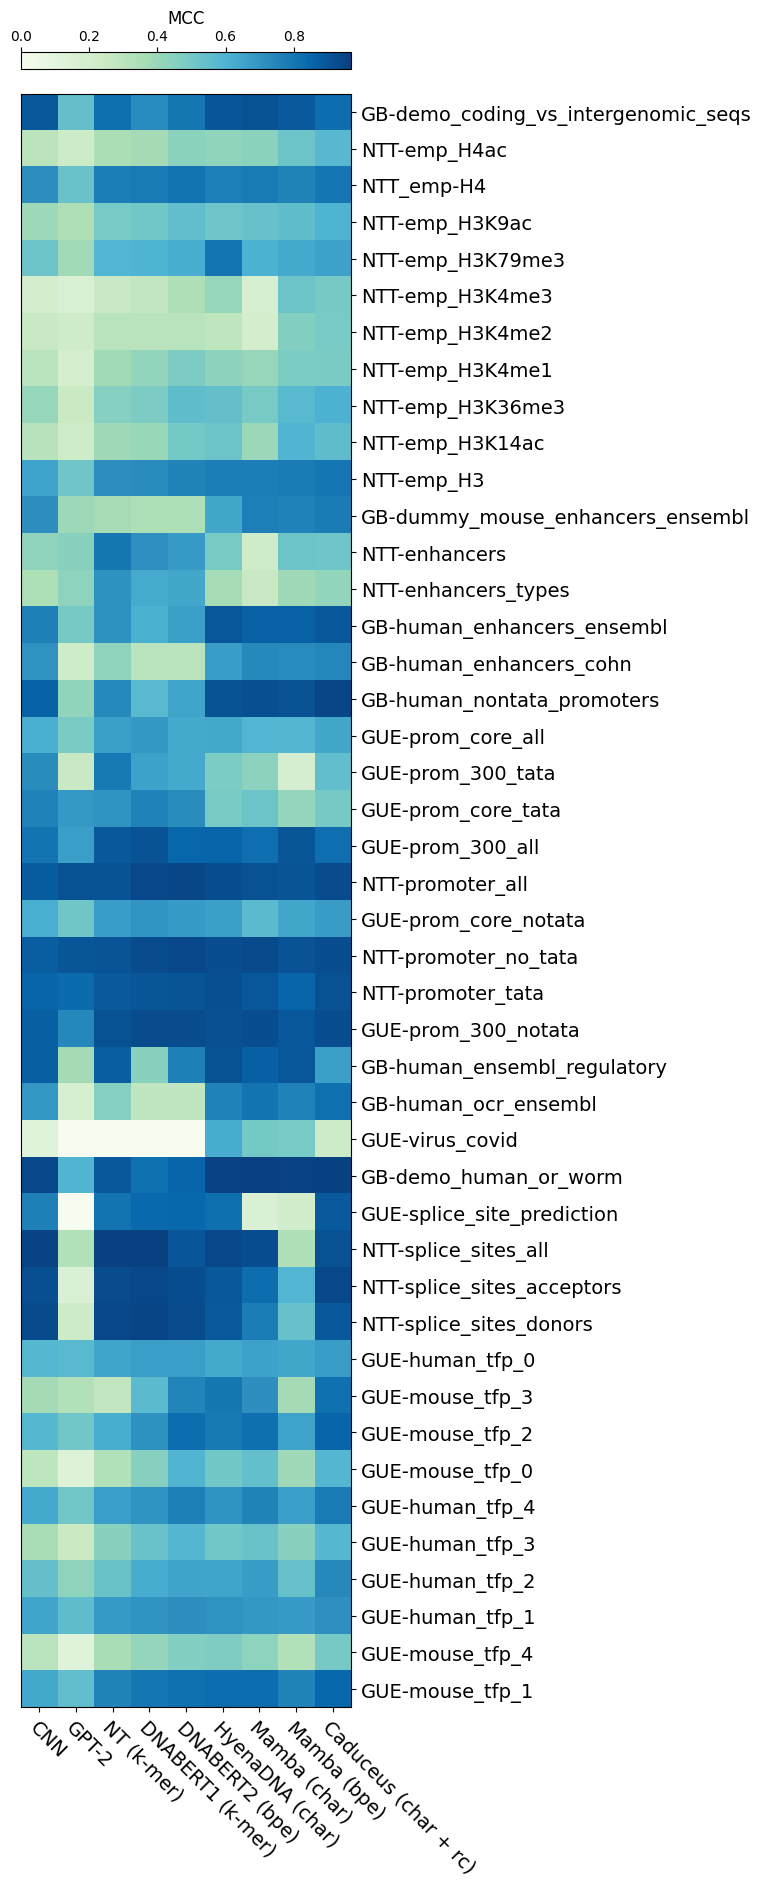

In [29]:
heatmap_mcc_vertical(df_numeric, 'Model Performance on All Benchmark Tasks', 'model_mcc_heatmap_all_vertical.pdf', 7, 27)

# Instability Trends - varying learning rate and batch size on genomic benchmark tasks


In [36]:
df_instability = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/instability_heatmap_gb.csv',index_col=0)
df_instability

,2e-3/128,2e-3/256,1e-3/64,1e-3/128,1e-3/256,1e-3/512,1e-4/64,1e-4/ 128,1e-4/256,1e-4/512,1e-5/64,1e-5/128,1e-5/256,1e-5/512,1e-6/64,1e-6/128,1e-6/256,1e-6/512
drosphilia,4,3,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ocr,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dummy_mouse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
demo_coding_vs_intergenic,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
demo_human_vs_worm,4,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
human_enhancers_cohn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
human_enhancers_ensembl,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
human_ensemble_regulatory,5,3,2,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0
human_nontata_promoters,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
df_instability_percent = df_instability.apply(lambda x: (x/10) * 100, axis=1)

In [38]:
df_instability_percent

,2e-3/128,2e-3/256,1e-3/64,1e-3/128,1e-3/256,1e-3/512,1e-4/64,1e-4/ 128,1e-4/256,1e-4/512,1e-5/64,1e-5/128,1e-5/256,1e-5/512,1e-6/64,1e-6/128,1e-6/256,1e-6/512
drosphilia,40.0,30.0,40.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ocr,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dummy_mouse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
demo_coding_vs_intergenic,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
demo_human_vs_worm,40.0,50.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human_enhancers_cohn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human_enhancers_ensembl,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human_ensemble_regulatory,50.0,30.0,20.0,60.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human_nontata_promoters,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


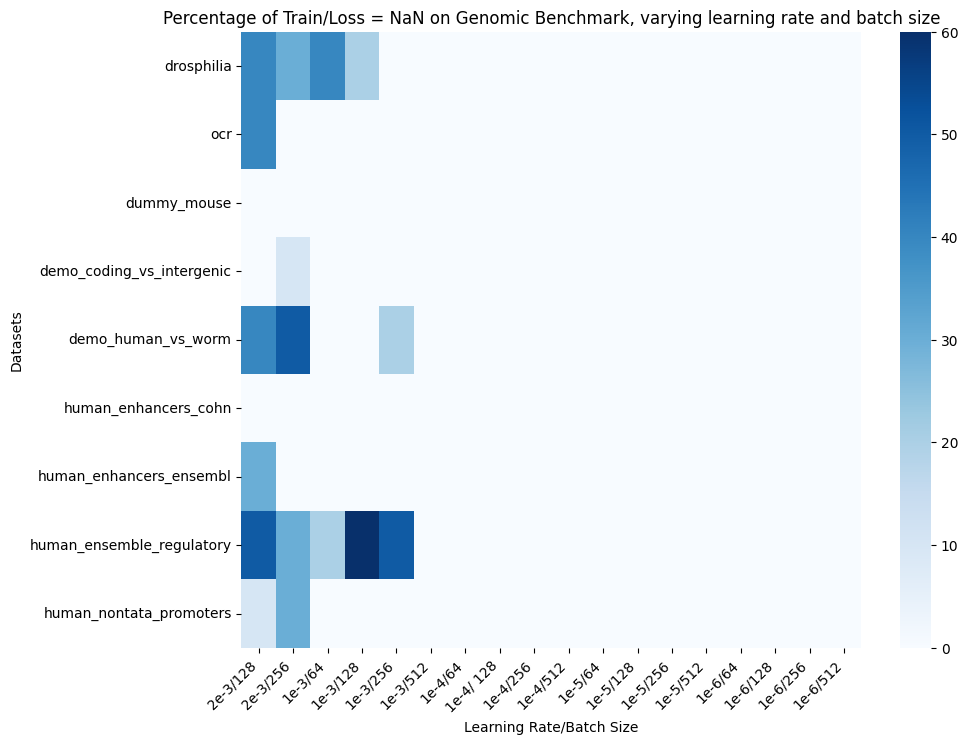

In [39]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_instability_percent, cmap="Blues")

# Customize the heatmap
plt.title('Percentage of Train/Loss = NaN on Genomic Benchmark, varying learning rate and batch size')
plt.xlabel('Learning Rate/Batch Size')
plt.ylabel('Datasets')

plt.xticks(rotation=45, ha='right')
plt.savefig('instability_heatmap_plot.pdf', format='pdf')

plt.show()

# DNABERT2 Training Species Data

In [40]:
headers = ['Class', 'Species', 'Total Nucleotides']
dnabert2_species = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/DNABERT_species.txt',names=headers )


In [41]:
dnabert2_species

,Class,Species,Total Nucleotides
0,Fungi,Ceratobasidium,655.37
1,Fungi,Claviceps Maximensis,329.79
2,Fungi,Fusarium Annulatum,449.98
3,Fungi,Melampsora,699.52
4,Fungi,Metschnikowia,109.36
...,...,...,...
130,Bacteria,Verrucomicrobiales Bacterium,3.15
131,Bacteria,Vibrio,41.47
132,Bacteria,Victivallis Lenta,55.45
133,Bacteria,Virgibacillus Salexigens,44.18


In [42]:
dnabert2_species['Percentage'] = (dnabert2_species['Total Nucleotides'] / dnabert2_species['Total Nucleotides'].sum()) * 100
dnabert2_species

,Class,Species,Total Nucleotides,Percentage
0,Fungi,Ceratobasidium,655.37,0.201735
1,Fungi,Claviceps Maximensis,329.79,0.101516
2,Fungi,Fusarium Annulatum,449.98,0.138512
3,Fungi,Melampsora,699.52,0.215325
4,Fungi,Metschnikowia,109.36,0.033663
...,...,...,...,...
130,Bacteria,Verrucomicrobiales Bacterium,3.15,0.000970
131,Bacteria,Vibrio,41.47,0.012765
132,Bacteria,Victivallis Lenta,55.45,0.017069
133,Bacteria,Virgibacillus Salexigens,44.18,0.013599


In [43]:
summary = dnabert2_species.groupby('Class')['Total Nucleotides'].sum().reset_index()

In [44]:
summary

,Class,Total Nucleotides
0,Bacteria,3597.73
1,Fungi,3772.98
2,Invertebrate,49964.57
3,Mammalian,186931.55
4,Other Vertebrate,79355.99
5,Protozoa,1243.64


In [45]:
summary['Percentage'] = (summary['Total Nucleotides'] / summary['Total Nucleotides'].sum()) * 100
summary

,Class,Total Nucleotides,Percentage
0,Bacteria,3597.73,1.107449
1,Fungi,3772.98,1.161394
2,Invertebrate,49964.57,15.380033
3,Mammalian,186931.55,57.541043
4,Other Vertebrate,79355.99,24.427265
5,Protozoa,1243.64,0.382816


In [46]:
mask = ~dnabert2_species['Class'].str.contains('Mammalian')

# Separate into 'Mammalian' and other families
mammalian_df = dnabert2_species[~mask]
mammalian_df['Class'] = mammalian_df['Species']

other_df = dnabert2_species[mask]

# Summarize other families
summary_mammalian = other_df.groupby('Class')['Total Nucleotides'].sum().reset_index()

# Append 'Mammalian' families back to the summary
summary_mammalian = pd.concat([summary_mammalian, mammalian_df], ignore_index=True)
summary_mammalian.drop(columns=['Species'], inplace=True)
summary_mammalian.drop(columns=['Percentage'], inplace=True)

summary_mammalian['Percentage'] = (summary_mammalian['Total Nucleotides'] / summary_mammalian['Total Nucleotides'].sum()) * 100
sorted_summary = summary_mammalian.sort_values(by='Percentage', ascending=False)
print(sorted_summary)

                      Class  Total Nucleotides  Percentage
3          Other Vertebrate           79355.99   24.427265
2              Invertebrate           49964.57   15.380033
7                     Human           31372.10    9.656922
5           Bubalus Bubalis           28768.00    8.855331
9              Macaca Nigra           28217.13    8.685763
8         Macaca Assamensis           27593.76    8.493878
10             Mus Musculus           26545.98    8.171351
11  Peromyscus Californicus           24677.56    7.596217
6       Camelus Dromedarius           19757.02    6.081582
1                     Fungi            3772.98    1.161394
0                  Bacteria            3597.73    1.107449
4                  Protozoa            1243.64    0.382816


<ipython-input-46-498970d63e00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mammalian_df['Class'] = mammalian_df['Species']


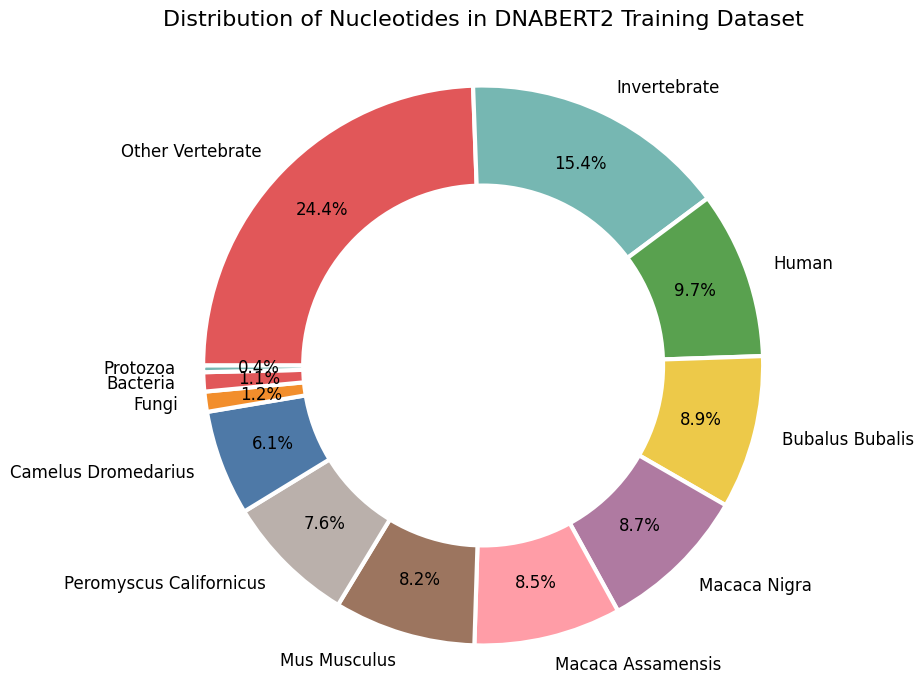

In [47]:
plt.figure(figsize=(10, 8))

plt.pie(sorted_summary['Total Nucleotides'],
        labels=sorted_summary['Class'],
        autopct='%1.1f%%',
        pctdistance=0.80,
        textprops={'fontsize':12},
        colors = ["#e15759", "#76b7b2", "#59a14f", "#edc949", "#af7aa1", "#ff9da7", "#9c755f", "#bab0ab", "#4e79a7","#f28e2c"],
        startangle=180,
        counterclock=False,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
        )


hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.title('Distribution of Nucleotides in DNABERT2 Training Dataset\n', fontsize=16)
plt.gcf().gca().add_artist(hole)
#plt.legend(sorted_summary['Class'], loc='center left', bbox_to_anchor=(0.87, 0.5))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('dnabert2_pie.eps', bbox_inches='tight')

# Show the plot
plt.show()

# BPE vs Char visualization

In [48]:
bpevschar = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/bpevschar_all.csv')
bpevschar

,Model,Benchmark,Task,Category,Layers,char-acc,bpe-acc,char-mcc,bpe-mcc
0,Mamba,Nucleotide Transformer Tasks,H3,emp,4,0.885,0.870,0.774,0.780
1,Mamba,Nucleotide Transformer Tasks,H3K14ac,emp,4,0.684,0.770,0.399,0.596
2,Mamba,Nucleotide Transformer Tasks,H3K36me3,emp,4,0.723,0.769,0.489,0.573
3,Mamba,Nucleotide Transformer Tasks,H3K4me1,emp,4,0.696,0.733,0.405,0.483
4,Mamba,Nucleotide Transformer Tasks,H3K4me2,emp,4,0.613,0.726,0.198,0.463
...,...,...,...,...,...,...,...,...,...
56,Mamba,Genomic Benchmark,human_enhancers_ensembl,enhancers,4,0.864,0.864,0.736,0.730
57,Mamba,Genomic Benchmark,human_nontata_promoters,promoters,4,0.920,0.914,0.864,0.864
58,Mamba,Genomic Benchmark,human_ensembl_regulatory,regulatory,4,0.866,0.895,0.866,0.895
59,Mamba,Genomic Benchmark,human_ocr_ensembl,regulatory,4,0.805,0.757,0.920,0.914


In [49]:
bpevschar['bpe-mcc'] = pd.to_numeric(bpevschar['bpe-mcc'], errors='coerce')
bpevschar['bpe-mcc'].fillna(0, inplace=True)
bpevschar

,Model,Benchmark,Task,Category,Layers,char-acc,bpe-acc,char-mcc,bpe-mcc
0,Mamba,Nucleotide Transformer Tasks,H3,emp,4,0.885,0.870,0.774,0.780
1,Mamba,Nucleotide Transformer Tasks,H3K14ac,emp,4,0.684,0.770,0.399,0.596
2,Mamba,Nucleotide Transformer Tasks,H3K36me3,emp,4,0.723,0.769,0.489,0.573
3,Mamba,Nucleotide Transformer Tasks,H3K4me1,emp,4,0.696,0.733,0.405,0.483
4,Mamba,Nucleotide Transformer Tasks,H3K4me2,emp,4,0.613,0.726,0.198,0.463
...,...,...,...,...,...,...,...,...,...
56,Mamba,Genomic Benchmark,human_enhancers_ensembl,enhancers,4,0.864,0.864,0.736,0.730
57,Mamba,Genomic Benchmark,human_nontata_promoters,promoters,4,0.920,0.914,0.864,0.864
58,Mamba,Genomic Benchmark,human_ensembl_regulatory,regulatory,4,0.866,0.895,0.866,0.895
59,Mamba,Genomic Benchmark,human_ocr_ensembl,regulatory,4,0.805,0.757,0.920,0.914


In [50]:
bpevschar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      61 non-null     object 
 1   Benchmark  61 non-null     object 
 2   Task       61 non-null     object 
 3   Category   61 non-null     object 
 4   Layers     61 non-null     int64  
 5   char-acc   61 non-null     float64
 6   bpe-acc    61 non-null     float64
 7   char-mcc   61 non-null     float64
 8   bpe-mcc    61 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 4.4+ KB


In [51]:
bpevschar.columns.tolist()

['Model',
 'Benchmark',
 'Task',
 'Category',
 'Layers',
 'char-acc',
 'bpe-acc',
 'char-mcc',
 'bpe-mcc']

In [52]:
bpevschar_gue = bpevschar[bpevschar['Benchmark'] == 'GUE']
bpevschar_gb = bpevschar[bpevschar['Benchmark'] == 'Genomic Benchmark']
bpevschar_nt = bpevschar[bpevschar['Benchmark'] == 'Nucleotide Transformer Tasks']

In [53]:
from matplotlib.lines import Line2D

In [54]:
def plot_bpe_vs_char(ax, df, df_subset, bpe, char, xlabel, ylabel, title, range_min, range_max):
  print(range_min, range_max)
  hex_colors = ["#e15759", "#76b7b2", "#59a14f", "#edc949", "#af7aa1", "#ff9da7", "#9c755f", "#bab0ab", "#4e79a7","#f28e2c"]
  markers = [ 'o', 's', 'd', 'P','v', '<', '>', 'p', 'P', '*', 'o', 's', 'D', '^',]

  unique_layers = df['Layers'].unique()
  print(unique_layers)
  unique_category = df['Category'].unique()
  print(unique_category)
  marker_map = {category: markers[i % len(markers)] for i, category in enumerate(unique_category)} # different color for each
  color_map = {category: hex_colors[i % len(hex_colors)] for i, category in enumerate(unique_category)}

  #for layer_size in unique_layers:
  for category in unique_category:
    subset = df_subset[(df_subset['Layers'] == 4) & (df_subset['Category'] == category)]
    #subset = df_subset[(df_subset['Category'] == category)]
    ax.scatter(subset[bpe], subset[char], c=color_map[category], marker=marker_map[category], label=None, s=36)


  ax.set_xlim([range_min, range_max])
  ax.set_ylim([range_min, range_max])

  ax.set_xlabel(xlabel, fontsize=12)
  ax.set_ylabel(ylabel, fontsize=12)
  ax.set_title(title, fontsize=14)

  # Add a diagonal line
  ax.plot([range_min, range_max], [range_min, range_max], color='#d3d3d3', linestyle='--')

  ax.grid(True, which="both", ls="--")

  #for layer in unique_layers:
  #  ax.scatter([], [], marker=marker_map[layer], color='grey', label=f'{layer} Layers')  # Empty scatter plot to create color legend

  unique_sub_category = df_subset['Category'].unique()
  for category in unique_sub_category:
    ax.scatter([], [], color=color_map[category], marker=marker_map[category], label=f'{category}')  # Empty scatter plot to create shape legend

  legend = ax.legend(loc='lower right', fontsize=10)
  legend.get_frame().set_linewidth(0)
  #plt.savefig('bpevschar.pdf', format='pdf', bbox_inches='tight')
  return ax

0.5 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']
0 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']
0.5 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']
0 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']
0.5 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']
0 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']


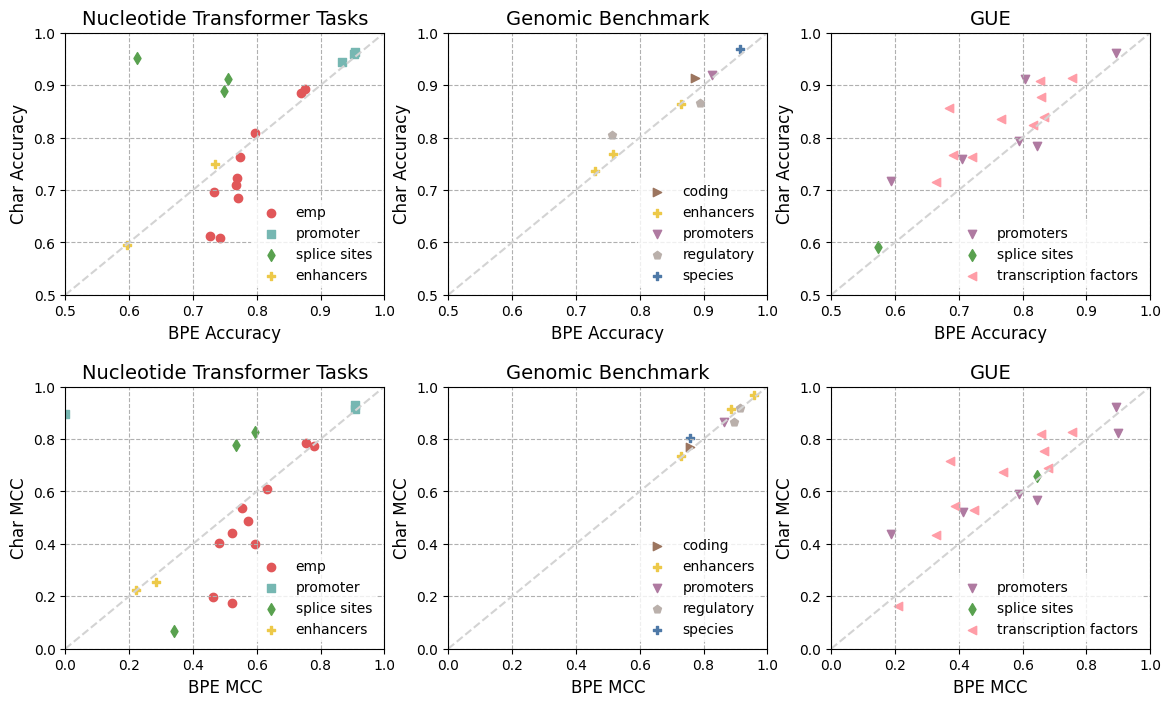

In [55]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
from matplotlib.ticker import StrMethodFormatter



scatter1 = plot_bpe_vs_char(axes[0,0], bpevschar, bpevschar_nt, 'bpe-acc', 'char-acc', 'BPE Accuracy', 'Char Accuracy', 'Nucleotide Transformer Tasks', 0.5, 1)
scatter2 = plot_bpe_vs_char(axes[1,0], bpevschar, bpevschar_nt, 'bpe-mcc', 'char-mcc', 'BPE MCC', 'Char MCC', 'Nucleotide Transformer Tasks', 0, 1)
scatter3 = plot_bpe_vs_char(axes[0,1], bpevschar, bpevschar_gb, 'bpe-acc', 'char-acc', 'BPE Accuracy', 'Char Accuracy', 'Genomic Benchmark', 0.5, 1)
scatter4 = plot_bpe_vs_char(axes[1,1], bpevschar, bpevschar_gb, 'bpe-mcc', 'char-mcc', 'BPE MCC', 'Char MCC', 'Genomic Benchmark', 0, 1)
scatter5 = plot_bpe_vs_char(axes[0,2], bpevschar, bpevschar_gue, 'bpe-acc', 'char-acc', 'BPE Accuracy', 'Char Accuracy', 'GUE', 0.5, 1)
scatter6 = plot_bpe_vs_char(axes[1,2], bpevschar, bpevschar_gue, 'bpe-mcc', 'char-mcc', 'BPE MCC', 'Char MCC', 'GUE', 0, 1)

fig.subplots_adjust(hspace=0.35)
fig.savefig('bpevschar.pdf', format='pdf', bbox_inches='tight')
#fig.suptitle("Tokenization Comparison on Mamba using the NT Tasks\n", fontsize=16)

# Variance

In [56]:
attention_models = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/anisa_results_tall.csv')

In [57]:
attention_models.head()


,model,task,task_category,task_benchmark,replicate_number,accuracy,f1,mcc,sequence_length,epoch
0,DNABERT-1 (6-mer),enhancers,Regulatory (human),Nucleotide Transformer,1,0.852310,0.852189,0.704499,200.0,4.0
1,DNABERT-1 (6-mer),enhancers_types,Regulatory (human),Nucleotide Transformer,1,0.767729,0.738276,0.630650,200.0,4.0
2,DNABERT-1 (6-mer),splice_sites_all,Splice Sites (human),Nucleotide Transformer,1,0.980667,0.980643,0.971021,600.0,5.0
3,DNABERT-1 (6-mer),splice_sites_acceptors,Splice Sites (human),Nucleotide Transformer,1,0.970694,0.970694,0.941455,400.0,5.0
4,DNABERT-1 (6-mer),splice_sites_donor,Splice Sites (human),Nucleotide Transformer,1,0.977242,0.977241,0.954496,400.0,5.0


In [58]:
models = attention_models['model'].unique()
models

array(['DNABERT-1 (6-mer)', 'DNABERT-2', 'NT 500M 1000G', 'HyenaDNA (1k)',
       'GPT2'], dtype=object)

In [59]:
metrics_list = []

for model in models:
  attention_model = attention_models[attention_models['model'] == model]
  tasks = attention_model['task'].unique()
  for task in tasks:
    attention_task = attention_model[attention_model['task'] == task]
    metrics_dict = {
      'Model': model,
      'Task': task,
      'Accuracy Mean': attention_task['accuracy'].mean(),
      'Accuracy Min': attention_task['accuracy'].min(),
      'Accuracy Max': attention_task['accuracy'].max(),
      'Accuracy Std': attention_task['accuracy'].std(),
      'MCC Mean': attention_task['mcc'].mean(),
      'MCC Min': attention_task['mcc'].min(),
      'MCC Max': attention_task['mcc'].max(),
      'MCC Std': attention_task['mcc'].std()
    }

    # Append the dictionary to the list
    metrics_list.append(metrics_dict)

metrics_df = pd.DataFrame(metrics_list)

# Display the dataframe
metrics_df

,Model,Task,Accuracy Mean,Accuracy Min,Accuracy Max,Accuracy Std,MCC Mean,MCC Min,MCC Max,MCC Std
0,DNABERT-1 (6-mer),enhancers,0.855628,0.848406,0.862720,0.004063,0.711278,0.696818,0.725447,0.008110
1,DNABERT-1 (6-mer),enhancers_types,0.767729,0.754717,0.777489,0.007649,0.628811,0.609519,0.646009,0.012649
2,DNABERT-1 (6-mer),splice_sites_all,0.978967,0.976000,0.981667,0.001902,0.968475,0.964053,0.972507,0.002839
3,DNABERT-1 (6-mer),splice_sites_acceptors,0.971506,0.967538,0.974301,0.002036,0.943086,0.935267,0.948650,0.004036
4,DNABERT-1 (6-mer),splice_sites_donor,0.974875,0.972690,0.977242,0.001559,0.949786,0.945539,0.954496,0.003088
...,...,...,...,...,...,...,...,...,...,...
191,GPT2,human_enhancers_ensembl,0.749173,0.744510,0.753035,0.002575,0.498583,0.489143,0.506529,0.005150
192,GPT2,human_ensembl_regulatory,0.745278,0.744205,0.746869,0.000983,0.372271,0.369993,0.376129,0.002031
193,GPT2,human_nontata_promoters,0.706311,0.699419,0.710490,0.003902,0.425762,0.403812,0.441510,0.011529
194,GPT2,human_ocr_ensembl,0.587543,0.584058,0.590352,0.001978,0.175068,0.167906,0.180535,0.004050


In [60]:
metrics_df['Accuracy Std'].mean()

0.009567410083551588

In [61]:
metrics_df['MCC Std'].mean()

0.01754722327066838

In [62]:
metrics_df.to_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/attention_metrics.csv', index=False)